<a href="https://colab.research.google.com/github/shaloy-lewis/bike_sharing_demand_prediction/blob/main/Bike_Sharing_Demand_Prediction_Shaloy_lewis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing the libraries and the dataset:**

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading data
path = '/content/drive/MyDrive/Bike sharing demand prediction - Shaloy Lewis/SeoulBikeData.csv'

df = pd.read_csv(path, encoding = 'unicode_escape')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

The dataset contains 8760 records and 14 attributes.

# **Data cleaning:**

**Renaming the column headers:**

In [ ]:
df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'}, inplace=True)

In [ ]:
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# checking for null values
df.isna().sum()

date                 0
rented_bike_count    0
hour                 0
temperature          0
humidity             0
wind_speed           0
visibility           0
dew_point_temp       0
solar_radiation      0
rainfall             0
snowfall             0
seasons              0
holiday              0
func_day             0
dtype: int64

There are no null values in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               8760 non-null   object 
 1   rented_bike_count  8760 non-null   int64  
 2   hour               8760 non-null   int64  
 3   temperature        8760 non-null   float64
 4   humidity           8760 non-null   int64  
 5   wind_speed         8760 non-null   float64
 6   visibility         8760 non-null   int64  
 7   dew_point_temp     8760 non-null   float64
 8   solar_radiation    8760 non-null   float64
 9   rainfall           8760 non-null   float64
 10  snowfall           8760 non-null   float64
 11  seasons            8760 non-null   object 
 12  holiday            8760 non-null   object 
 13  func_day           8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


**Converting the date column from object to datetime datatype:**

In [ ]:
df['date'] = df['date'].apply(lambda x: dt.strptime(x,'%d/%m/%Y'))

In [ ]:
# Days between which the data is collected
print('Start date: ',df['date'].min())
print('End date: ',df['date'].max())

Start date:  2017-12-01 00:00:00
End date:  2018-11-30 00:00:00


In [ ]:
# Number of days for which the data is collected
print('Number of days the data is collected: ',df['date'].max()-df['date'].min())

Number of days the data is collected:  364 days 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               8760 non-null   datetime64[ns]
 1   rented_bike_count  8760 non-null   int64         
 2   hour               8760 non-null   int64         
 3   temperature        8760 non-null   float64       
 4   humidity           8760 non-null   int64         
 5   wind_speed         8760 non-null   float64       
 6   visibility         8760 non-null   int64         
 7   dew_point_temp     8760 non-null   float64       
 8   solar_radiation    8760 non-null   float64       
 9   rainfall           8760 non-null   float64       
 10  snowfall           8760 non-null   float64       
 11  seasons            8760 non-null   object        
 12  holiday            8760 non-null   object        
 13  func_day           8760 non-null   object        
dtypes: datet

# **Feature Engineering:**

We know that the dew point temperature is related to temperature and can be approximated as follows:

Td = T - ((100 - RH)/5.)

Where

* Td - Dew point temperature (in degrees Celsius)
* T  - Observed temperature (in degrees Celsius)
* RH - Relative humidity (in percent)

[Reference](https://iridl.ldeo.columbia.edu/dochelp/QA/Basic/dewpoint.html)

Text(0.5, 1.0, 'Temperature VS Dew point Temperature')

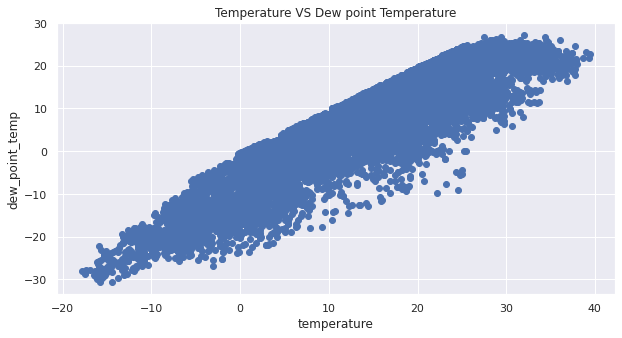

In [ ]:
# Scatter plot to visualize the relationship between
# temperature and dew point temperature
plt.figure(figsize=(10,5))
plt.scatter(x='temperature',y='dew_point_temp',data=df)
plt.xlabel('temperature')
plt.ylabel('dew_point_temp')
plt.title('Temperature VS Dew point Temperature')

In [ ]:
df[['temperature','dew_point_temp']].corr()

,temperature,dew_point_temp
temperature,1.000000,0.912798
dew_point_temp,0.912798,1.000000


The temperature and dew point temperature are highly correlated (0.912).

Also, from the above scatter plot, it is clear that as the temperature increases, the dew point temperature also increases.

Hence we can drop the column from the dataset since it will not increase the accuracy of predictions, and will only increase the model complexity.

In [ ]:
df.drop('dew_point_temp', axis=1,inplace=True)

**Deriving new columns 'month' and 'day_of_week' from the 'date' column:**

In [ ]:
#add month, day_of_week columns
for df in [df]:
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek

# {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

**Adding new column 'weekend', which indicates whether a given day is a weekday(0) or a weekend(1):**

In [ ]:
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x>4 else 0)

In [ ]:
# map = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [ ]:
# df['day_of_week'] = df['day_of_week'].replace(map)

In [ ]:
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,month,day_of_week,weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4,0


# **Exploratory Data Analysis:**

In [ ]:
df.describe()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,month,day_of_week,weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,0.569111,0.148687,0.075068,6.526027,3.002740,0.284932
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,0.868746,1.128193,0.436746,3.448048,1.998056,0.451408
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,0.010000,0.000000,0.000000,7.000000,3.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000,10.000000,5.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000,12.000000,6.000000,1.000000


**Analyzing the distribution of the dependent variable:**

In [ ]:
dependent_variable = ['rented_bike_count']

Text(0.5, 1.0, 'rented_bike_count distribution')

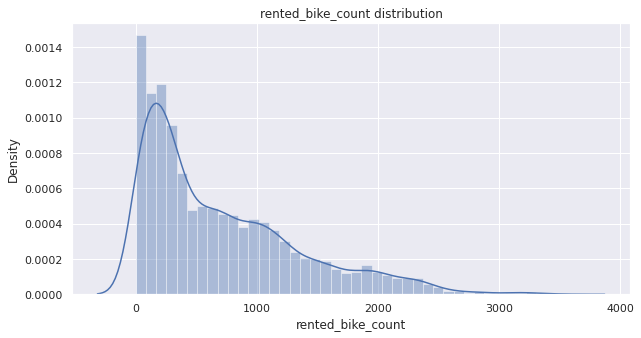

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df[dependent_variable])
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')

The dependent variable is positively skewed.

**Analyzing the distribution of the continuous independent variables:**

In [ ]:
continuous_var = ['temperature', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']

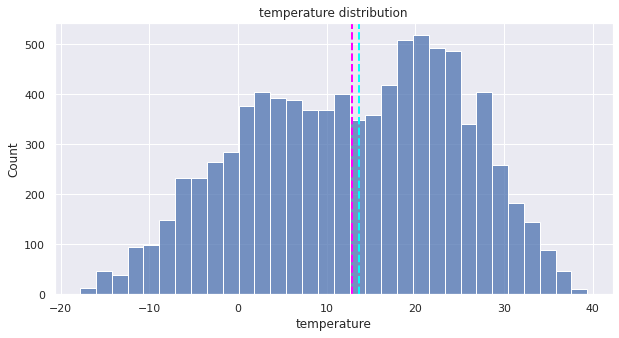

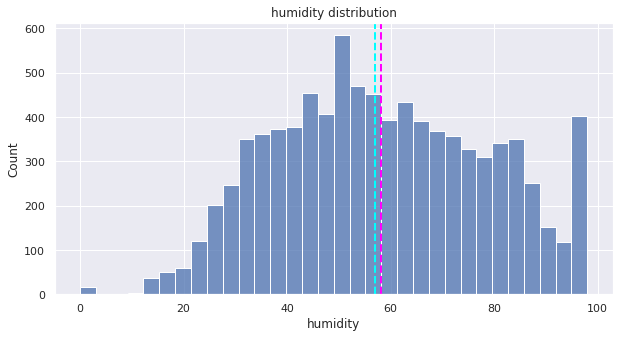

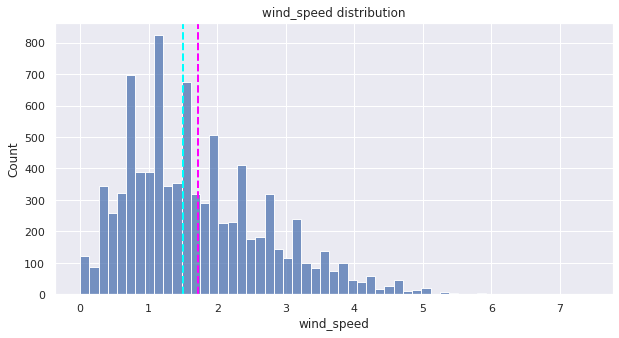

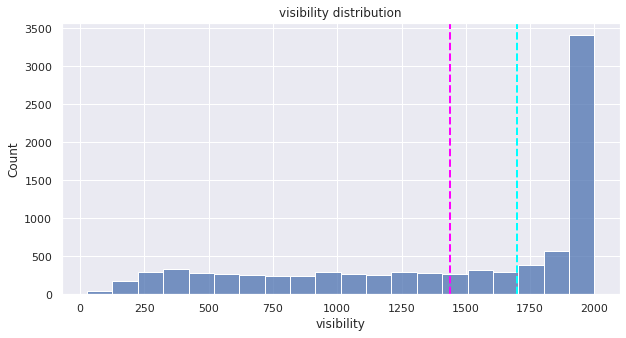

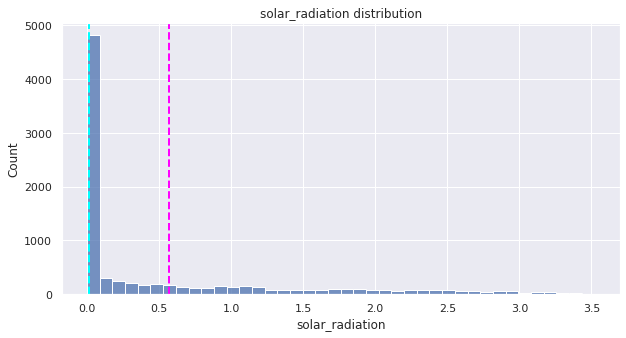

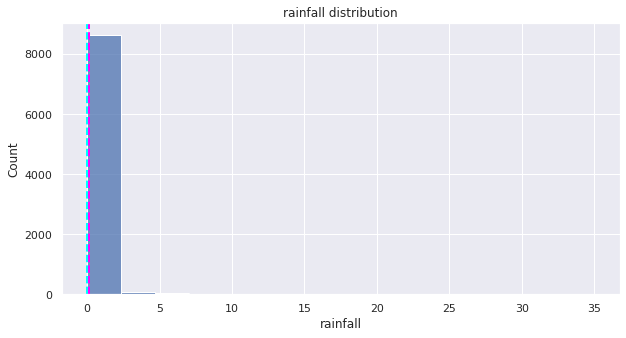

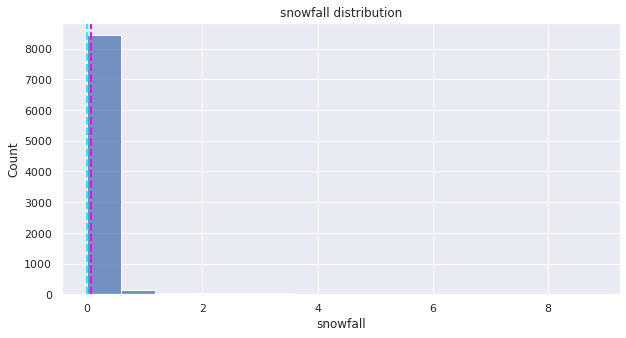

In [ ]:
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

Summary:

* Normally skewed attributes: temperature, humidity.
* Positively skewed attributes: wind, solar_radiation, snowfall, rainfall.
* Negatively skewed attributes: visibility.

**Analyzing the relationship between the dependent variable and the continuous variables in the data:**

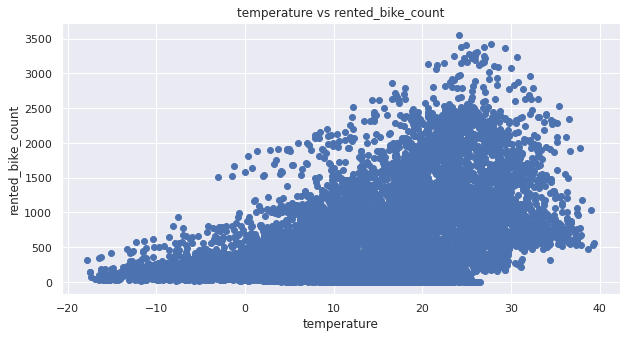

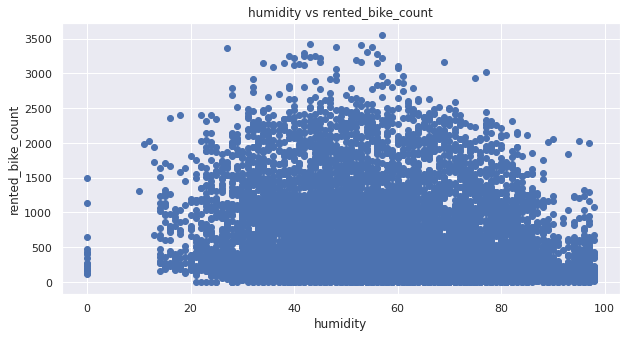

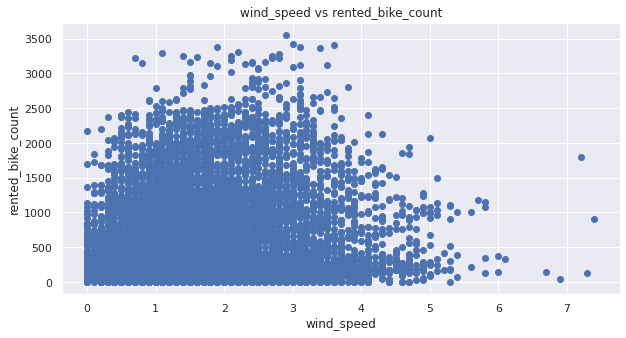

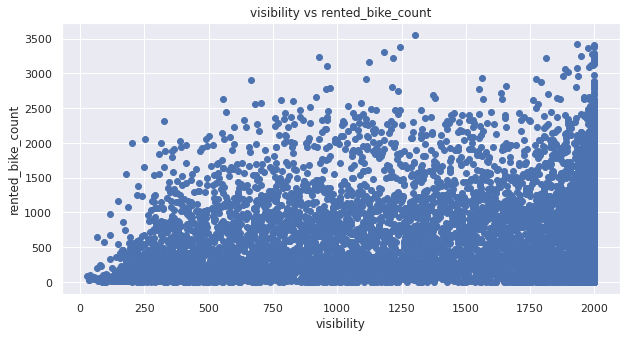

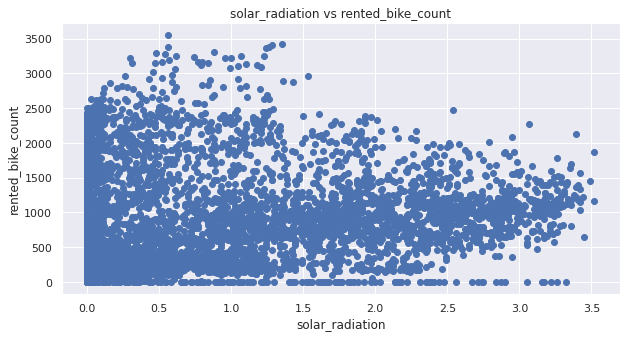

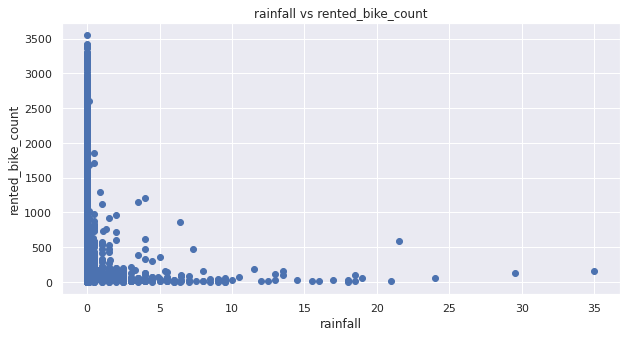

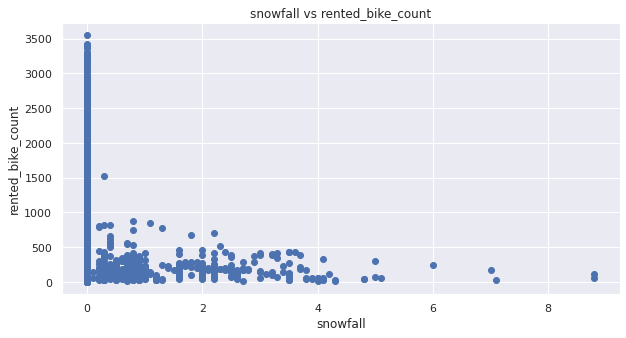

In [ ]:
for i in continuous_var:
  plt.figure(figsize=(10,5))
  plt.scatter(x=i,y=dependent_variable[0],data=df)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

Summary:

* Positively correlated variables: temperature, windspeed, visibility, solar radiation.
* Negatively correlated variables: humidity, rainfall, snowfall.

**Analyzing the relationship between the dependent variable and the categorical variables in the data:**

In [ ]:
categorical_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend']

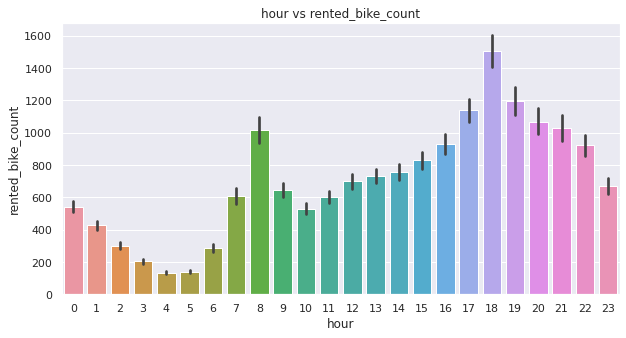

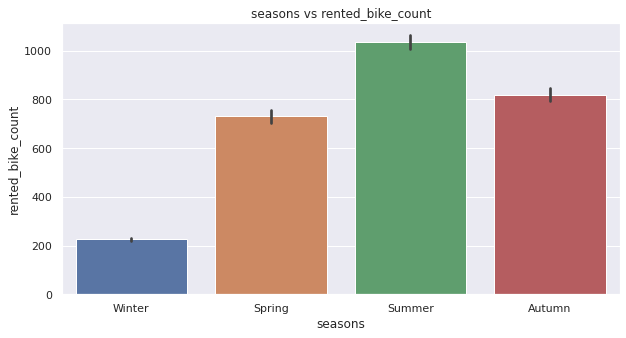

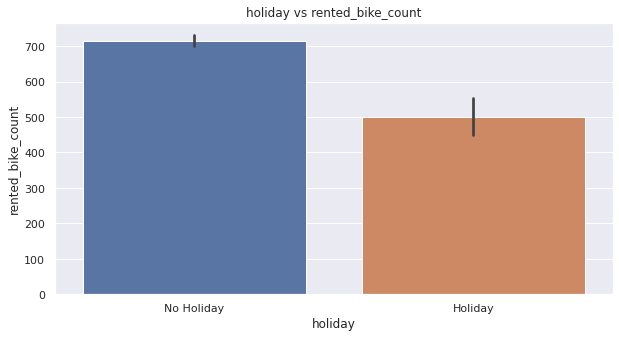

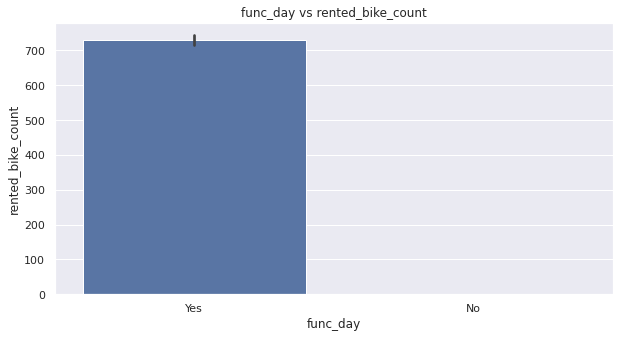

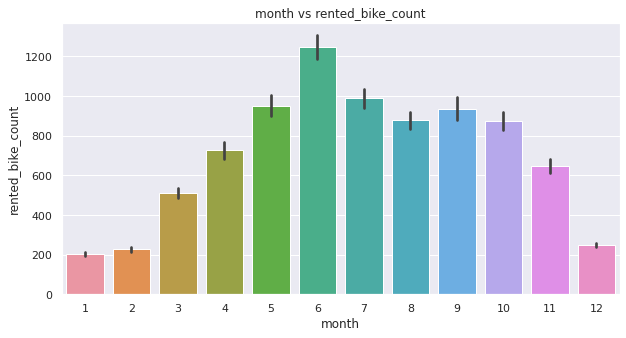

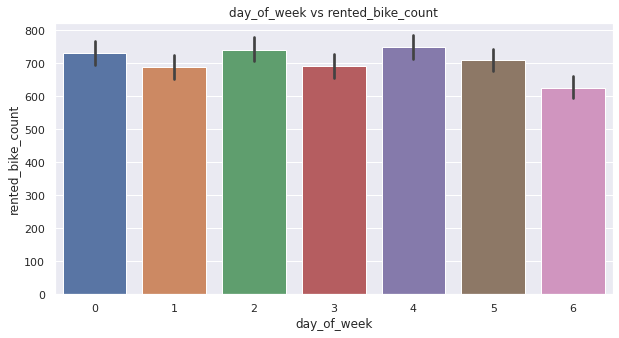

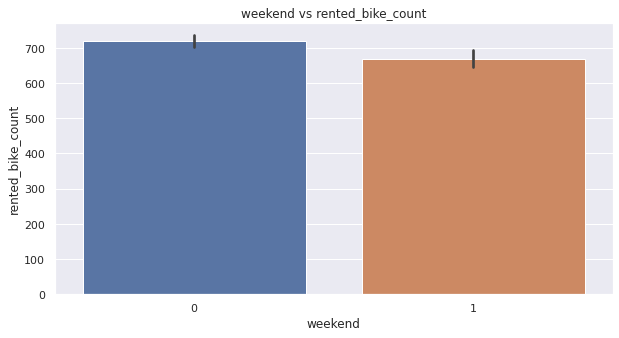

In [ ]:
for i in categorical_var:
  plt.figure(figsize=(10,5))
  sns.barplot(x=i,y=dependent_variable[0],data=df)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

In [ ]:
# Highest rented bike count on a functioning day vs a non functioning day
df.groupby(['func_day'])['rented_bike_count'].max()

func_day
No        0
Yes    3556
Name: rented_bike_count, dtype: int64

In [ ]:
# Non functioning days in the dataset
df[(df['func_day']=='No')]['date'].unique()

array(['2018-04-11T00:00:00.000000000', '2018-05-10T00:00:00.000000000',
       '2018-09-18T00:00:00.000000000', '2018-09-19T00:00:00.000000000',
       '2018-09-28T00:00:00.000000000', '2018-09-30T00:00:00.000000000',
       '2018-10-02T00:00:00.000000000', '2018-10-04T00:00:00.000000000',
       '2018-10-06T00:00:00.000000000', '2018-10-09T00:00:00.000000000',
       '2018-11-03T00:00:00.000000000', '2018-11-06T00:00:00.000000000',
       '2018-11-09T00:00:00.000000000'], dtype='datetime64[ns]')

On a non functioning day, no bikes are rented in all the instances of the data.

Summary:

* The number of bikes rented is on average higher during the rush hours.
* The rented bike counts is higher during the summer and lowest during the winter.
* The rented bike count is higher on working days than on non working days.
* On a non functioning day, no bikes are rented in all the instances of the data.
* The number of bikes rented on average remains constant throughout Monday - Saturday, it dips on Sunday, and on average, the rented bike counts is lower on weenends than on weekdays.


**Correlation analysis:**

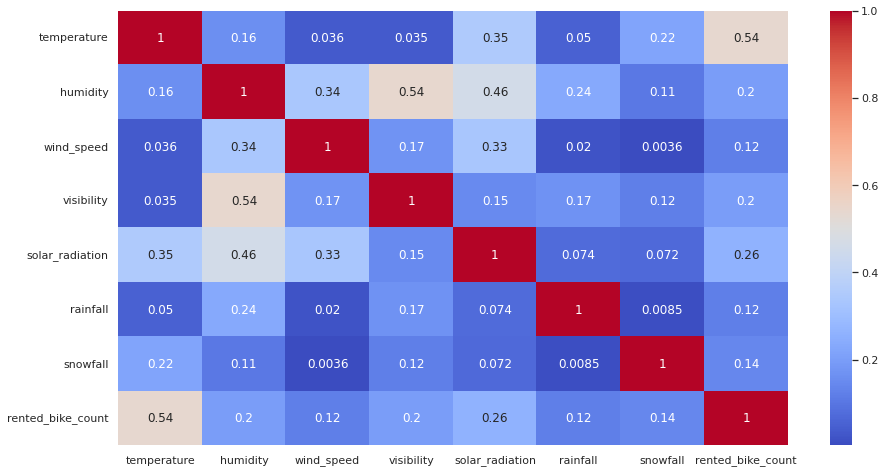

In [ ]:
 ## Correlation magnitude for continuous variables
plt.figure(figsize=(15,8))
correlation = df[continuous_var+dependent_variable].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

There is no multicollinerity in the data.

**Outlier analysis:**

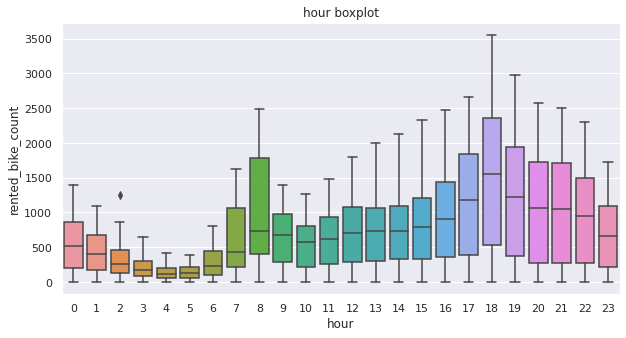

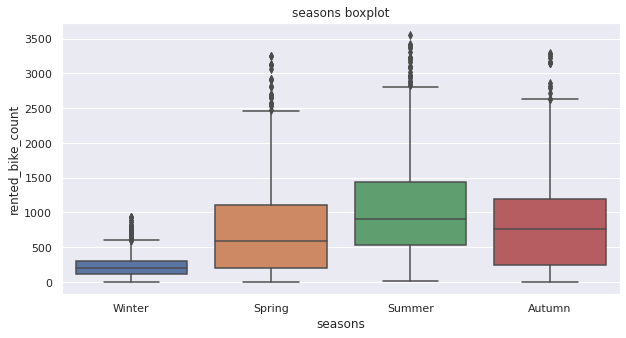

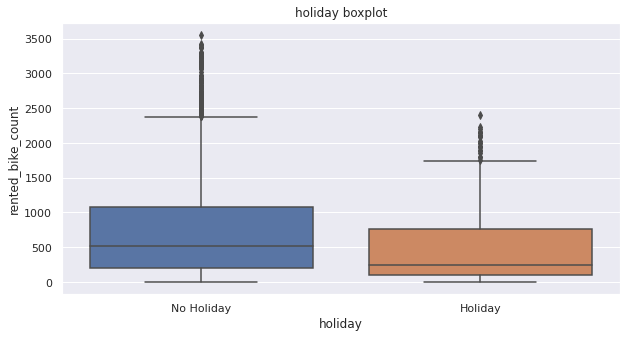

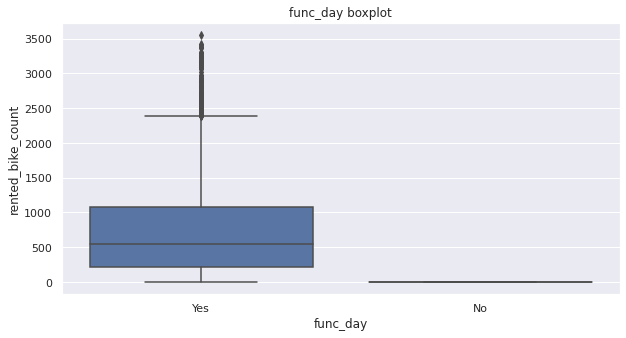

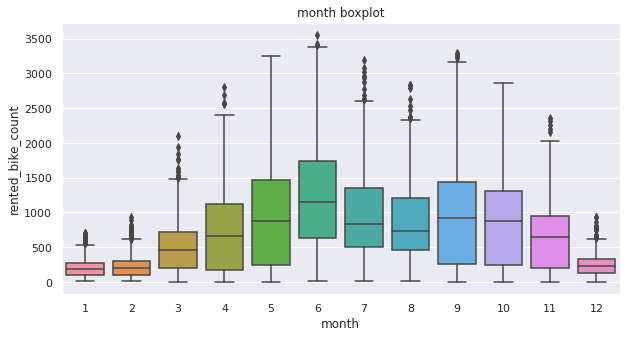

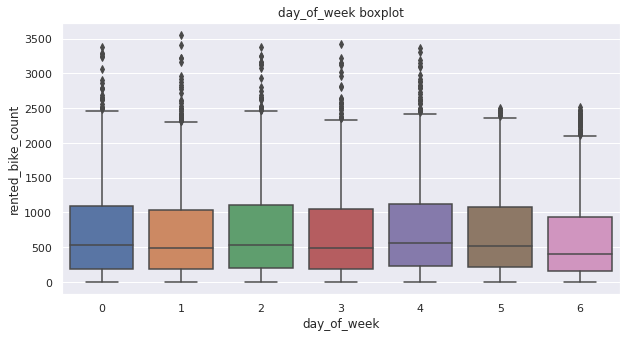

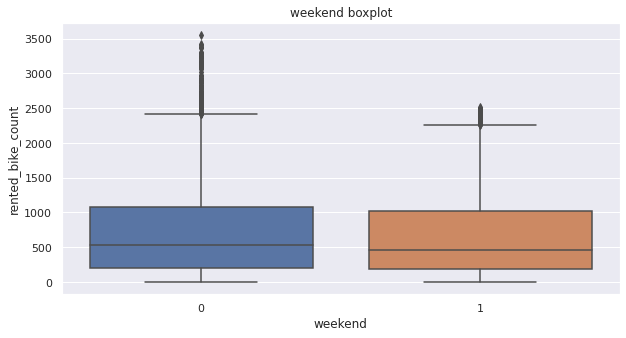

In [ ]:
for col in categorical_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(x = col,y = dependent_variable[0],data=df)
  plt.title(col+' boxplot')
  plt.show()

There are outliers in the data and this must be taken into consideration in the model building phase.

**Patterns in data:**

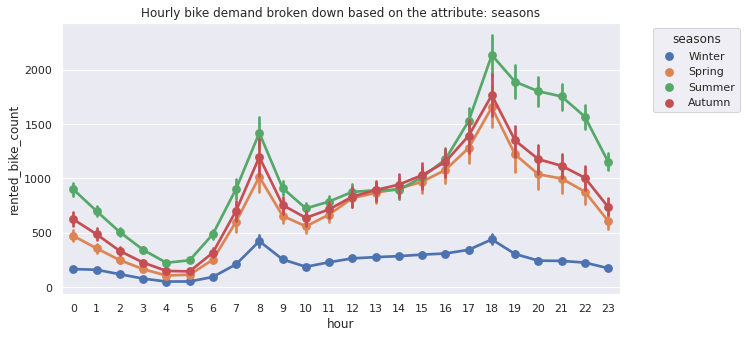

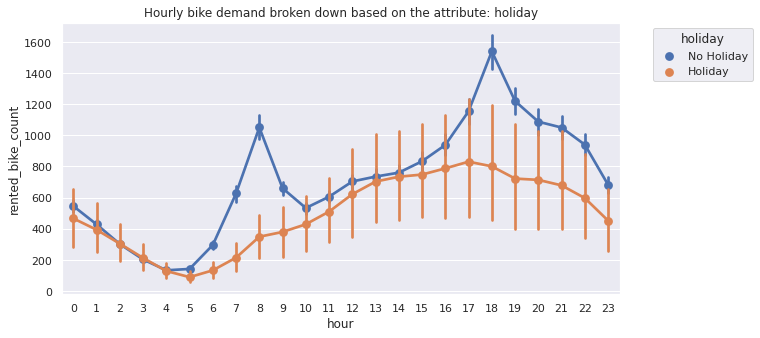

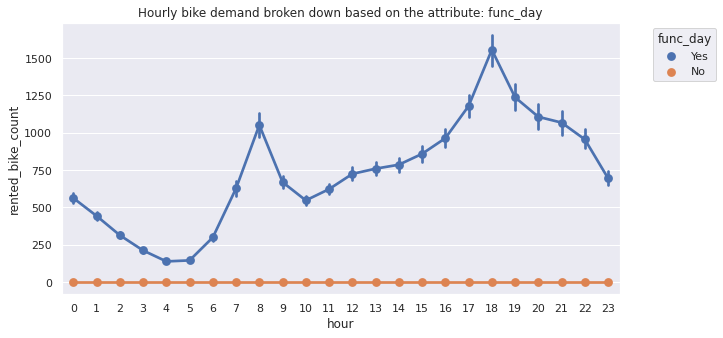

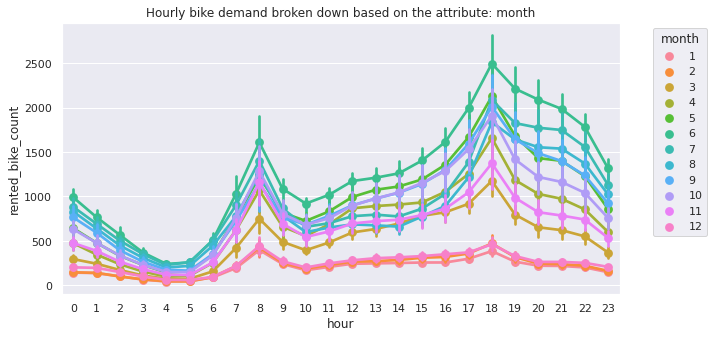

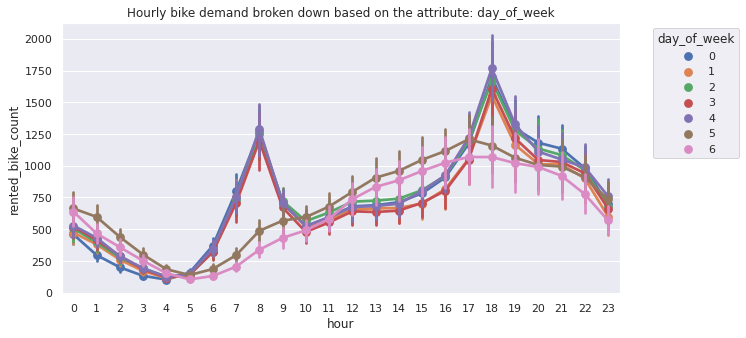

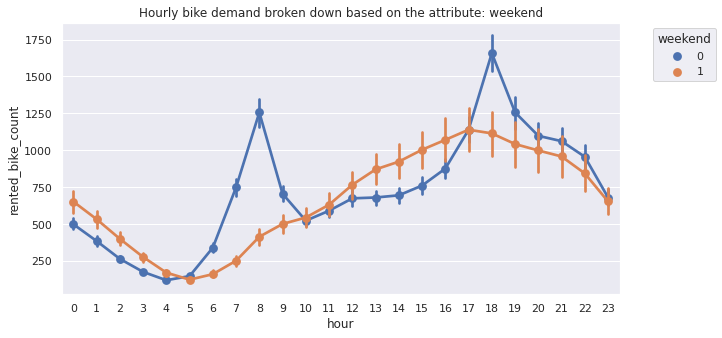

In [ ]:
for i in categorical_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.pointplot(data=df, x='hour', y='rented_bike_count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show

Summary:

* In winters the overall demand for rented bikes is comparitively lower than that of other seasons.
* On a non functioning day, no bikes are rented.
* The demand for rented bikes throughout the day on holidays and weekends follow a different pattern than other days. On regular days, the demand for the bikes is higher during rush hours. On holidays or weekends, the demand is comparitively lower in the mornings, and is higher in the afternoons

# **Modeling:**

**Encoding the data to fit a model:**

In [ ]:
df['func_day'] = np.where(df['func_day'] == 'Yes',1,0)
df['holiday'] = np.where(df['holiday'] == 'Holiday', 1,0)
df = pd.get_dummies(df, columns=["seasons"],prefix='season',prefix_sep='_')

In [ ]:
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,holiday,func_day,month,day_of_week,weekend,season_Autumn,season_Spring,season_Summer,season_Winter
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,12,4,0,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,12,4,0,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,12,4,0,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,12,4,0,0,0,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,12,4,0,0,0,0,1


The date column cannot be used to build a ML model. Hence we can drop it.

In [ ]:
df.drop('date',axis=1,inplace=True)

In [ ]:
df.shape

(8760, 18)

The prediction model should be chosen in such a way that it:
* Is able to predict the dependent variable with high accuracy (Accuracy).
* Is easy to interpret (Interpretability)
* Is easy to explain the model (Explainability).

**Choice of model:**

**Since we are working with data that:**
* Contains outliers
* Contains many categorical independent variables
* Is not lineraly related to the dependent variable

It is not advisable to use linear models to make the predictions. We can use tree models insted.

**Modeling approach:**

* Use a decision tree regressor model to come up with initial set of predictions
* Calculate the model accuracy using the regression evaluation metrics
* Improve the model accuracy by hyperparameter tuning
* Find feature importances from the baseline model
* Use bagging/boosting algorithms to increase the model accuracy. (PS: explainability reduces as the model complexity increases)
* Choose the model with the highest accuracy for deployment

**Why is accuracy in prediction of dependent variable important in businesses?**

There are many reasons, some of them in this context are:
* Ensuring enough supply of bikes
* Scheduling the right amount of staff
* Making attainable financial plans
* Strategically planning marketing campaigns

These are some of the reasons why it is necessary to achieve higher prediction accuracies with the help of complex ML algoriths.

[Reference](https://smallbusiness.chron.com/advantages-accurate-forecasting-60830.html)

In [ ]:
df.shape

(8760, 18)

**Choice of split:**

Since the dataset used here is compact with just 8760 records, and 18 attributes, we can use K-fold cross validation rather than train-test split.

**Evaluation metrics:**

* We know that the data we are working with contains outliers, we didnt drop them because if we do so, we may loose out important trends/patterns in the data.
* Decision Trees or any tree based algorithms that we will use here are known to handle outliers. Hence we can use RMSE as the evaluation metric.
* Since RMSE penalizes outliers a lot, this is a good metric to check whether ot not the model has learnt all the trends/patterns in the data.

In [112]:
from sklearn.metrics import mean_squared_error

def rmse(actual,predicted):
  '''
  rmse(actual_y,predicted_y)
  '''
  mse = mean_squared_error(actual,predicted)
  rmse = np.sqrt(mse)
  return rmse

**1. Decision tree:**

In [ ]:
# Defining dependent and independent variables
X = df.drop('rented_bike_count',axis=1)
y = df[dependent_variable]

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [132]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [173]:
# Using gridsearchcv to find the hyperparameters with best predictions
dt_model = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(10,30,2),
             'min_samples_leaf':np.arange(15,51,2),
             }

In [174]:
dt_gridsearch = GridSearchCV(dt_model,dt_params,cv=6, scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [175]:
dt_best_params

{'max_depth': 16, 'min_samples_leaf': 15}

In [176]:
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],min_samples_leaf=dt_best_params['min_samples_leaf'],random_state=0)

In [177]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=16, min_samples_leaf=15, random_state=0)

In [178]:
dt_model.score(X_train,y_train)

0.9151454412295535

In [179]:
dt_model.score(X_test,y_test)

0.878609424518921

In [180]:
dt_y_train_pred = dt_model.predict(X_train)

In [181]:
# training set error
rmse(y_train,dt_y_train_pred)

187.71058387609537

In [182]:
dt_y_test_pred = dt_model.predict(X_test)

In [183]:
# test error
rmse(y_test,dt_y_test_pred)

225.3989748519391

In [184]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

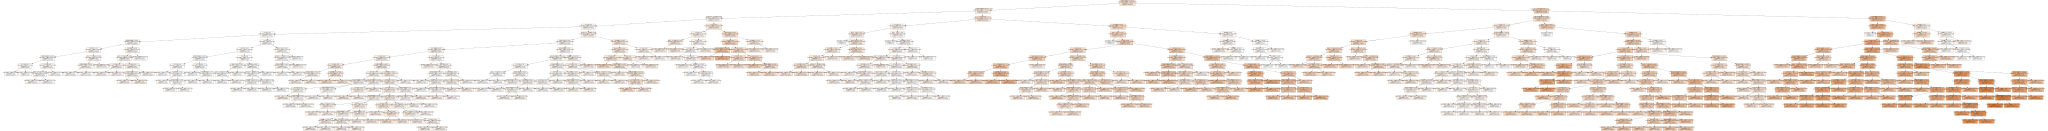

In [185]:
graph = Source(tree.export_graphviz(dt_model, out_file=None
   , feature_names=X_train.columns,filled= True))
display(SVG(graph.pipe(format='svg')))

Text(0.5, 0, 'Relative Importance')

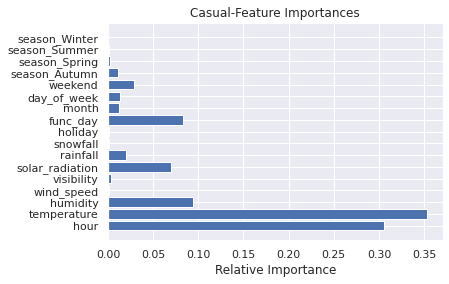

In [186]:
importances = dt_model.feature_importances_
plt.title('Casual-Feature Importances')
plt.barh(range(len(importances)), importances,  align='center')
plt.yticks(range(len(importances)), X.columns)
plt.xlabel('Relative Importance')

**2. Random Forests:**

In [187]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),
             'max_depth':np.arange(1,11,2),
             'min_samples_leaf':np.arange(2,15,3)}

In [189]:
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

KeyboardInterrupt: ignored

**3. Gradient Boosting:**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':np.arange(25,150,25),
             'max_depth':np.arange(1,11,2),
             'min_samples_leaf':np.arange(2,15,3)}

gb_gridsearch = GridSearchCV(gb_model,gb_params,cv=6,scoring='neg_root_mean_squared_error')
gb_gridsearch.fit(X_train,y_train)
gb_best_params = gb_gridsearch.best_params_

**4. XG Boost:**

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb(random_state=0)
xgb_params = {'n_estimators':np.arange(25,150,25),
             'max_depth':np.arange(1,11,2),
             'min_samples_leaf':np.arange(2,15,3)}

xgb_gridsearch = GridSearchCV(xgb_model,xgb_params,cv=6,scoring='neg_root_mean_squared_error')
xgb_gridsearch.fit(X_train,y_train)
xgb_best_params = xgb_gridsearch.best_params_